In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2023-09-27 16:45:56.296208: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-27 16:45:56.297503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 16:45:56.324393: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 16:45:56.325362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 16:45:56.830493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
os.chdir('bumblebee-test')
if os.path.isdir('train/barbutellus') is False:
    os.makedirs('train/barbutellus')
    os.makedirs('train/bohemicus')
    os.makedirs('train/campestris')
    os.makedirs('train/cryptarum')
    os.makedirs('train/distinguendus')
    os.makedirs('train/hortorum')
    os.makedirs('test/barbutellus')
    os.makedirs('test/bohemicus')
    os.makedirs('test/campestris')
    os.makedirs('test/cryptarum')
    os.makedirs('test/distinguendus')
    os.makedirs('test/hortorum')
    os.makedirs('validate/barbutellus')
    os.makedirs('validate/bohemicus')
    os.makedirs('validate/campestris')
    os.makedirs('validate/cryptarum')
    os.makedirs('validate/distinguendus')
    os.makedirs('validate/hortorum')
    
    for i in random.sample(glob.glob('*barbutellus*'), 20):
        shutil.move(i, 'train/barbutellus')      
    for i in random.sample(glob.glob('*bohemicus*'), 20):
        shutil.move(i, 'train/bohemicus')
    for i in random.sample(glob.glob('*campestris*'), 20):
        shutil.move(i, 'train/campestris')
    for i in random.sample(glob.glob('*cryptarum*'), 20):
        shutil.move(i, 'train/cryptarum')
    for i in random.sample(glob.glob('*distinguendus*'), 20):
        shutil.move(i, 'train/distinguendus')
    for i in random.sample(glob.glob('*hortorum*'), 20):
        shutil.move(i, 'train/hortorum')
    for i in random.sample(glob.glob('*barbutellus*'), 6):
        shutil.move(i, 'validate/barbutellus')   
    for i in random.sample(glob.glob('*bohemicus*'), 6):
        shutil.move(i, 'validate/bohemicus')    
    for i in random.sample(glob.glob('*campestris*'), 6):
        shutil.move(i, 'validate/campestris') 
    for i in random.sample(glob.glob('*cryptarum*'), 6):
        shutil.move(i, 'validate/cryptarum') 
    for i in random.sample(glob.glob('*distinguendus*'), 6):
        shutil.move(i, 'validate/distinguendus') 
    for i in random.sample(glob.glob('*hortorum*'), 6):
        shutil.move(i, 'validate/hortorum') 
    for i in random.sample(glob.glob('*barbutellus*'), 5):
        shutil.move(i, 'test/barbutellus')      
    for i in random.sample(glob.glob('*bohemicus*'), 5):
        shutil.move(i, 'test/bohemicus')
    for i in random.sample(glob.glob('*campestris*'), 5):
        shutil.move(i, 'test/campestris')
    for i in random.sample(glob.glob('*cryptarum*'), 5):
        shutil.move(i, 'test/cryptarum')
    for i in random.sample(glob.glob('*distinguendus*'), 5):
        shutil.move(i, 'test/distinguendus')
    for i in random.sample(glob.glob('*hortorum*'), 5):
        shutil.move(i, 'test/hortorum')

os.chdir('../../')

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [6]:
train_path = 'data/bumblebee-test/train'
validate_path = 'data/bumblebee-test/validate'
test_path = 'data/bumblebee-test/test'

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10, shuffle=False)

Found 120 images belonging to 6 classes.
Found 36 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [10]:
imgs, labels = next(train_batches)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

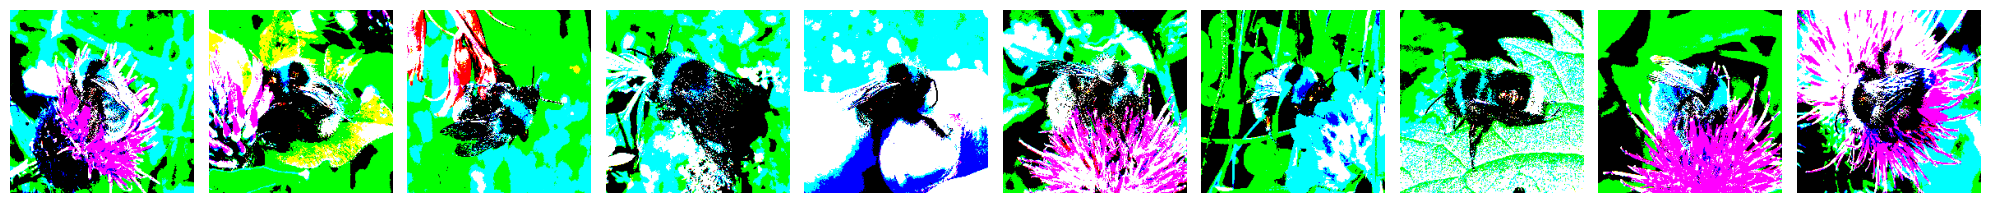

[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [12]:
plotImages(imgs)
print(labels)